In [1]:
import psycopg2

# Database connection parameters
dbname = 'testing1'
user = 'postgres'
password = 'suraj'
host = 'localhost'  # or the IP address of your PostgreSQL server
port = '5432'  # default port for PostgreSQL

try:
    # Establish a connection to the database
    conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)
    print("Connected to the database")
except psycopg2.Error as e:
    print("Unable to connect to the database")
    print(e)

Connected to the database


In [3]:
import pandas as pd

# Ensure you have a connection (conn) as established in the previous step

# Create a cursor object
cur = conn.cursor()

# Execute a query
cur.execute("SELECT * FROM ibm_test;")

# Fetch the results
rows = cur.fetchall()

# Optionally, load into a Pandas DataFrame for easier analysis
df = pd.DataFrame(rows, columns=[desc[0] for desc in cur.description])

# print(df)

# Close the cursor
cur.close()



In [5]:
import pandas as pd

# Load the dataset
file_path = 'IBM.csv'
ibm_df = pd.read_csv(file_path)

# Convert string columns to appropriate types
ibm_df['forecast_period_end_date'] = pd.to_numeric(ibm_df['forecast_period_end_date'], errors='coerce')
ibm_df['estimator'] = pd.to_numeric(ibm_df['estimator'], errors='coerce')
ibm_df['analyst_code'] = pd.to_numeric(ibm_df['analyst_code'], errors='coerce')
ibm_df['forecast_value'] = pd.to_numeric(ibm_df['forecast_value'], errors='coerce')
ibm_df['activation_date'] = pd.to_datetime(ibm_df['activation_date'], errors='coerce')


In [6]:
# Summary statistics for numerical columns
print(ibm_df.describe())


            item_id     estimator   analyst_code  canadian_currency  \
count  2.811500e+04  28115.000000   28115.000000                0.0   
mean   1.582381e+07  20370.664307  251693.855771                NaN   
min    1.580975e+07      3.000000       0.000000                NaN   
25%    1.581678e+07    189.000000    9236.000000                NaN   
50%    1.582381e+07   1784.000000   78750.000000                NaN   
75%    1.583083e+07  51020.000000  583684.000000                NaN   
max    1.583786e+07  91560.000000  655364.000000                NaN   
std    8.116246e+03  25136.615496  268264.923882                NaN   

       forecast_period_end_date  forecast_value  \
count              28115.000000    28115.000000   
mean                3803.426641        4.408395   
min                    0.000000       -5.100000   
25%                  906.000000        1.310000   
50%                 1709.000000        2.845000   
75%                 8812.000000        4.970000   
max

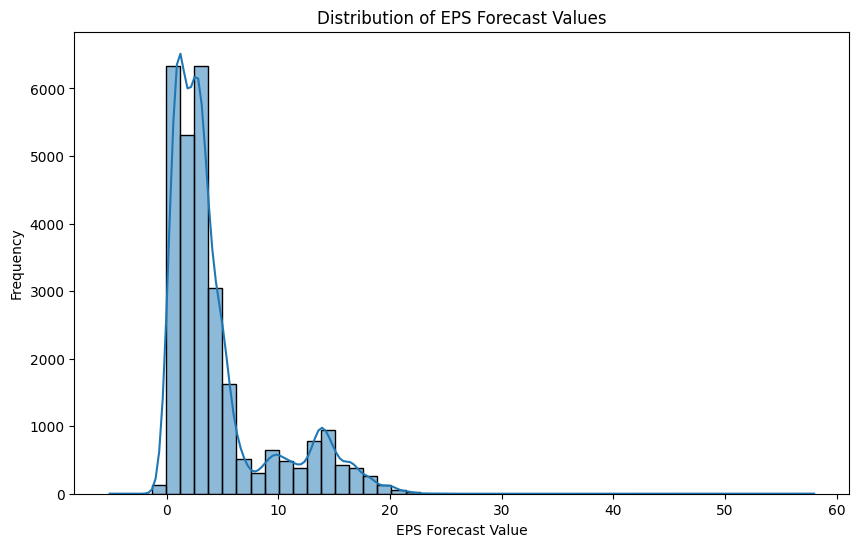

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of forecast values (EPS estimates)
plt.figure(figsize=(10, 6))
sns.histplot(ibm_df['forecast_value'], bins=50, kde=True)
plt.title('Distribution of EPS Forecast Values')
plt.xlabel('EPS Forecast Value')
plt.ylabel('Frequency')
plt.show()


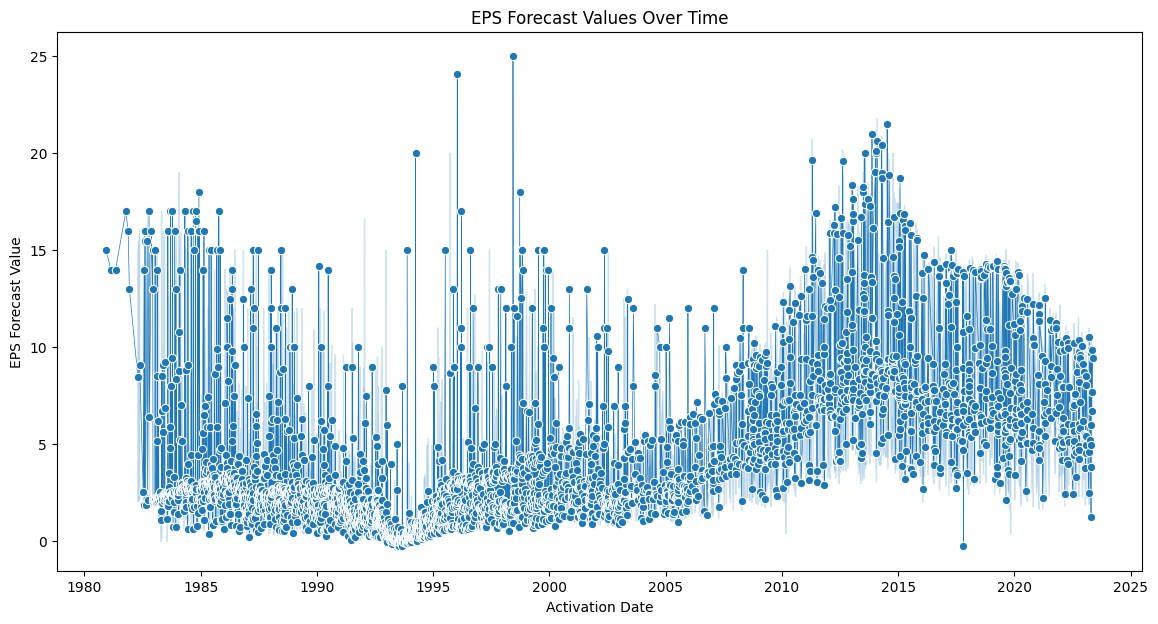

In [8]:
# Time series of EPS forecast values
plt.figure(figsize=(14, 7))
sns.lineplot(data=ibm_df, x='activation_date', y='forecast_value', marker='o', linestyle='-', lw=0.5)
plt.title('EPS Forecast Values Over Time')
plt.xlabel('Activation Date')
plt.ylabel('EPS Forecast Value')
plt.show()


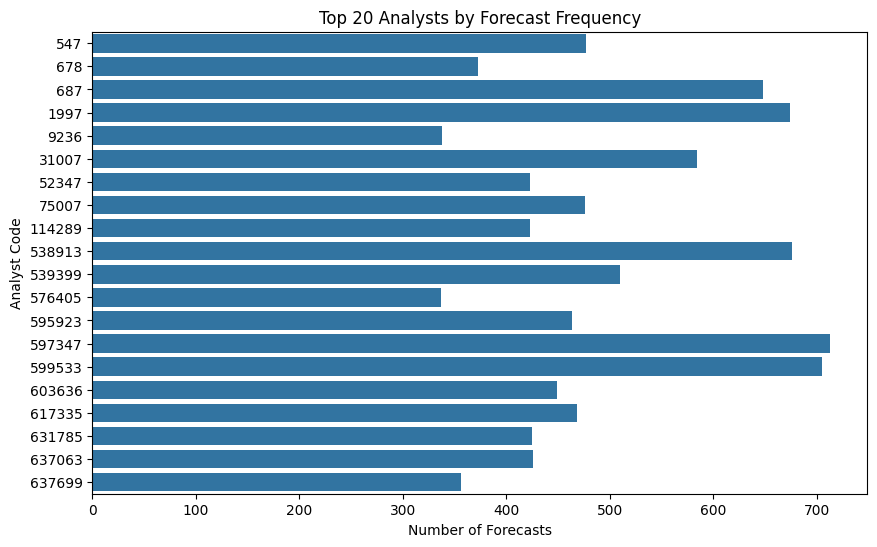

In [9]:
# Analyst forecast frequency
analyst_counts = ibm_df['analyst_code'].value_counts().head(20)  # Top 20 analysts by number of forecasts
plt.figure(figsize=(10, 6))
sns.barplot(x=analyst_counts.values, y=analyst_counts.index, orient='h')
plt.title('Top 20 Analysts by Forecast Frequency')
plt.xlabel('Number of Forecasts')
plt.ylabel('Analyst Code')
plt.show()


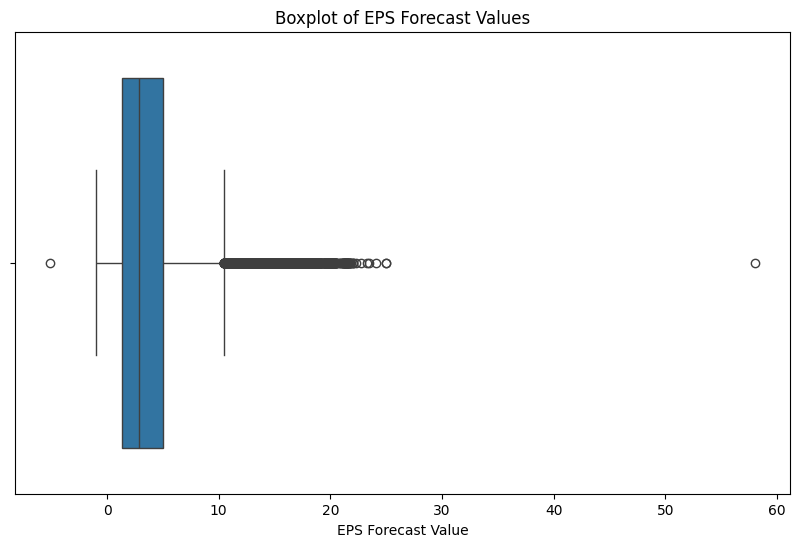

In [10]:
# Boxplot of forecast values to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=ibm_df['forecast_value'])
plt.title('Boxplot of EPS Forecast Values')
plt.xlabel('EPS Forecast Value')
plt.show()


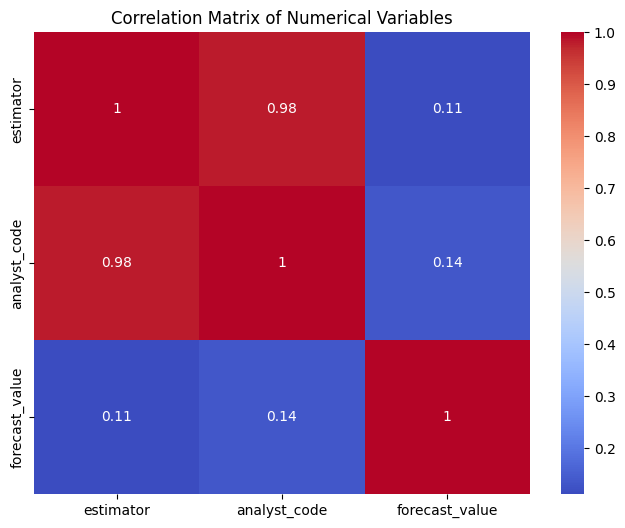

In [11]:
# Check for correlations between numerical variables
correlation_matrix = ibm_df[['estimator', 'analyst_code', 'forecast_value']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


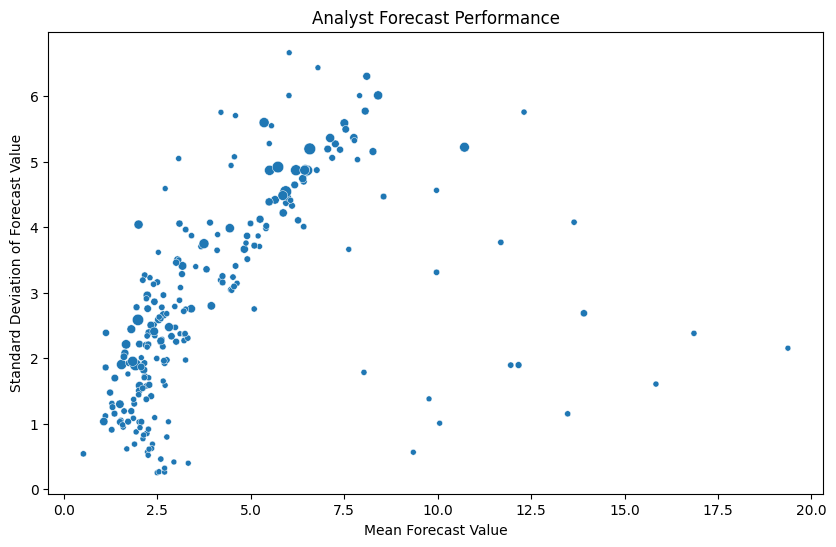

In [12]:
# Assuming ibm_df is your DataFrame and necessary conversions are done
active_analysts = ibm_df.groupby('analyst_code')['forecast_value'].agg(['mean', 'std', 'count'])
active_analysts = active_analysts[active_analysts['count'] > 10]  # Filter for analysts with more than 10 forecasts

plt.figure(figsize=(10, 6))
sns.scatterplot(data=active_analysts, x='mean', y='std', size='count', legend=False)
plt.xlabel('Mean Forecast Value')
plt.ylabel('Standard Deviation of Forecast Value')
plt.title('Analyst Forecast Performance')
plt.show()